# House Price Prediction using Linear Regression

## Part 1: Feature Engineering

In [3]:
# import libraries only ONCE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Reading in the data and dropping duplicates
housing_df = pd.read_csv('train.csv')
housing_df = housing_df.drop_duplicates()

# Selecting all relevant columns (includes features and labels)
selected_columns_df = housing_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold", "SalePrice"]]

# Dropping any incomplete columns (columns with nan values)
selected_columns_df = selected_columns_df.dropna()

housing_features_df = selected_columns_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold"]]
housing_features_df.head()

sales_price_df  = selected_columns_df[['SalePrice']]
sales_price_df.head()

# We have only three categorical nominal features:
# - LotShape
# - LotConfig
# - Neighborhood

# Transforming categorical nominal features into 1-hot encodings

lotshape_list = housing_features_df["LotShape"].to_list()
lotconfig_list = housing_features_df["LotConfig"].to_list()
neighborhood_list = housing_features_df["Neighborhood"].to_list()

# Convert to list of lists that scikit learn 1-hot encoder expects
lotshape_list_of_list = [[el] for el in lotshape_list]
lotconfig_list_of_list = [[el] for el in lotconfig_list]
neighborhood_list_of_list = [[el] for el in neighborhood_list]

lotshape_encoder = OneHotEncoder()
lotconfig_encoder = OneHotEncoder()
neighborhood_encoder = OneHotEncoder()

# Fit the data
lotshape_transformed = lotshape_encoder.fit_transform(lotshape_list_of_list)
lotconfig_transformed = lotconfig_encoder.fit_transform(lotconfig_list_of_list)
neighborhood_transformed = neighborhood_encoder.fit_transform(neighborhood_list_of_list)

# Create numpy matrices
lotshape_transformed = lotshape_transformed.toarray()
lotconfig_transformed = lotconfig_transformed.toarray()
neighborhood_transformed = neighborhood_transformed.toarray()

# Merging the 1-hot vectors back to the dataframe
lotshape_transformed_df = pd.DataFrame(lotshape_transformed)
lotconfig_transformed_df = pd.DataFrame(lotconfig_transformed)
neighborhood_transformed_df = pd.DataFrame(neighborhood_transformed)

# Sanity check for 1-hot vector sizes
# - LotShape should result in a 1-hot vector of size 4
# - LotConfig should result in a 1-hot vector of size 5
# - Neighborhood should result in a 1-hot vector of size 25
print(f"LotShape 1-hot shape = {lotshape_transformed_df.shape}")
print(f"LotConfig 1-hot shape = {lotconfig_transformed_df.shape}")
print(f"Neighborhood 1-hot shape = {neighborhood_transformed_df.shape}")

# Concatenate back into the dataframe
housing_features_df.reset_index(drop=True, inplace=True)
lotshape_transformed_df.reset_index(drop=True, inplace=True)
lotconfig_transformed_df.reset_index(drop=True, inplace=True)
neighborhood_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_df, lotshape_transformed_df, lotconfig_transformed_df, neighborhood_transformed_df], axis=1)

# Total columns we have  = 8 (original) + 4 + 5 + 25
# So, this should print 1460 * 42
print(f"Shape of data after concatenating all 1-hot encodings = {housing_features_transformed_df.shape}")

# Now drop columns we have already transformed into 1-hot
housing_features_transformed_df = housing_features_transformed_df.drop(columns=["LotShape", "LotConfig", "Neighborhood"], axis=1)
# Now, let's print the shape of our final data (should be 1460 * 39)
print(f"Shape of data after droping original categorical columns = {housing_features_transformed_df.shape}")

# Extra Credit : We are using MinMax Scaling
# It is debatable if we should scale categorical ordinal features such as "YearRemodAdd" and "MoSold"
# I have scaled everything for the sake of simplicity
scaler = MinMaxScaler()
housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']] = scaler.fit_transform(housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']])

housing_features_transformed_df.head()

LotShape 1-hot shape = (1460, 4)
LotConfig 1-hot shape = (1460, 5)
Neighborhood 1-hot shape = (1460, 25)
Shape of data after concatenating all 1-hot encodings = (1460, 42)
Shape of data after droping original categorical columns = (1460, 39)


,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.500,0.883333,0.259231,0.090909,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.875,0.433333,0.174830,0.363636,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,0.500,0.866667,0.273549,0.727273,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.500,0.333333,0.260550,0.090909,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.500,0.833333,0.351168,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Employing Linear Regression to predict the SalesPrice from the following features:

*   Lotshape
*   LotConfig
*   Neighborhood
*   OverallQual
*   OverallCond
*   YearRemodAdd
*   GrLivArea
*   MoSold

## Part 2: Data Splitting

Split our dataset into train, validation and test splits of size 80%-10%-10%.



In [4]:
from sklearn.model_selection import train_test_split

# split the data into 80% train and 20% temporary
x_train, x_temp, y_train, y_temp = train_test_split(housing_features_transformed_df, sales_price_df, test_size=0.20, random_state=42)

Here I split my data into an 80% train split and a 20% temporary split, which I will then split equally into validation and test splits to achieve two 10% splits of the entire dataset (50% of 20% of the data achieves two 10% splits).

In [5]:
# split the temporary dataset into 50% train and 50% test to achieve 10% splits of the overall dataset
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

## Part 3: Training a Linear Regression Model
Train our linear regression model using scikit-learn's LinearRegression module.

In [6]:
from sklearn.linear_model import LinearRegression

# Convert to numpy arrays
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Here I convert the train splits into appropriate numpy arrays since scikit learn expects matrices as input variables, and I use the fit() function to train the linear regression model on the training data.

In [7]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# Convert to numpy arrays
x_validation = x_validation.to_numpy()
y_validation = y_validation.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# perform prediction on validation set
y_validation_test = model.predict(x_validation)

# Obtain evaluation metrics
mse = metrics.mean_squared_error(y_validation, y_validation_test)
mae = metrics.mean_absolute_error(y_validation, y_validation_test)
correlation_coefficient = pearsonr(y_validation.flatten(), y_validation_test.flatten())

print (f"Mean Squared Error on training data {mse}")
print (f"Mean Absolute Error on training data {mae}")
print (f"Pearson correlation coefficient between actual and predicted values is {correlation_coefficient}")

Mean Squared Error on training data 850215381.869863
Mean Absolute Error on training data 21319.62328767123
Pearson correlation coefficient between actual and predicted values is PearsonRResult(statistic=0.9260169811133385, pvalue=8.470880099121373e-63)


After converting the validation and test splits to numpy arrays as well, I use the .predict() function to generate predictions based on the trained model. To evaluate the trained model, I use metrics from scikit learn and pearsonr from scipy to calculate the Mean Squared Error, Mean Absolute Error and Pearson correlation coefficient of the trained model.

## Part 4: Evaluation of Results
To better evaluate the results of the trained model, I first calculate some statistics of the Sale Price.

In [10]:
# Get descriptive statistics of sale price
sales_price_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



*   The MSE measures the average squared difference between the actual and predicted values. The MSE of the model is about 850 million which indicates that the squared difference between the actual price and predicted price is quite high.
*   The MAE measures the average absolute difference between the actual and predicted values. The MAE of the model is about 21,000 which means the models predictions are off by 21,000 which is quite high considering the mean sale price is $180,921.
*   The Pearson correlation coefficient measures the linear correlation between the actual and predicted values and ranges from -1 to 1. This value for the trained model is 0.926 which indicates that there is a strong positive linear correlation between the predicted values and actual values. This implies that the trained model captures the general trend in the data well but has major deviations (not very accurate)

Based on these results, I would not advise a realtor to use this model to help their client in purchasing a house in Boston mainly because the MSE and MAE values are too high. These large deviations in price could cause significant financial consequences to the buyer in some scenarios. Even though the model catches the general trend of the data, it may fail to accurately predict the price in individual cases which could result in detrimental financial situaions for the buyer.




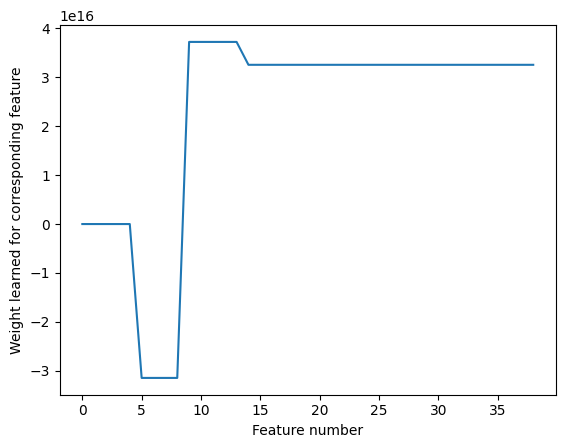

In [37]:
from matplotlib import pyplot as plt

# Plot the weights learned by the model
weights = model.coef_[0]
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

In [39]:
# Used for column matching
housing_features_df.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'GrLivArea', 'MoSold'],
      dtype='object')

In [40]:
# Used for column matching
housing_features_transformed_df.columns

Index([ 'OverallQual',  'OverallCond', 'YearRemodAdd',    'GrLivArea',
             'MoSold',              0,              1,              2,
                    3,              0,              1,              2,
                    3,              4,              0,              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24],
      dtype='object')

After interpretting the weights used in the model, it is evident that certain variables have more predictive power than others. From the graph, the variables with highest predictive power are LotConfig and Neighborhood, while the only variable with a negative influence on the model is LotShape. The other variables have a weight of 0 which means they have no predictive power in the model.

These results are skeptical since I expected variables like 'OverallQual', 'OverallCond' and 'GrLivArea' to have major influence on the model since these features are often considered crucial indicators of house prices in real estate models. It is reasonable to assume that a large, higher quality, good condition lot would sell for a higher sale price. However, the model doesn't seem to catch this which is definetely a red flag.

Another skeptical factor observed from the graph is the uniform weights within variables: all the subcategories of lotshape, lotconfig and neighborhood all have the same weight. It is reasonable to assume that more premium and modern lot configurations and neighborhoods will have higher sale prices than others, but the model doesn't seem to catch this.

Overall, I think the weights determined by the model are questionable and not very practical. There are several limitations of relying solely on model output for decision-making and further investigation is to be done.
